In [1]:
!ls


bank-additional-full.csv  sample_data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

### Step 1 – Data Loading

The Bank Marketing Campaign dataset was successfully loaded.
The dataset contains customer contact data from marketing campaigns.
The target variable `y` indicates whether a customer subscribed to the product.

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Step 2 – Funnel Definition

- Visitors: All contacted customers
- Leads: Customers with call duration greater than 0 seconds
- Customers: Customers who subscribed to the product (`y = yes`)

In [6]:
df['is_lead'] = df['duration'] > 0
df['is_customer'] = df['y'] == 'yes'

In [7]:
visitors = len(df)
leads = df['is_lead'].sum()
customers = df['is_customer'].sum()
visitors, leads, customers

(41188, np.int64(41184), np.int64(4640))

### Step 4 – Conversion Metrics

- Visitor → Lead Conversion Rate
- Lead → Customer Conversion Rate
- Overall Visitor → Customer Conversion Rate

These metrics help identify funnel efficiency and drop-off points.

In [8]:
visitor_to_lead_rate = (leads / visitors) * 100
lead_to_customer_rate = (customers / leads) * 100
visitor_to_customer_rate = (customers / visitors) * 100
visitor_to_lead_rate, lead_to_customer_rate, visitor_to_customer_rate

(np.float64(99.99028843352433),
 np.float64(11.266511266511268),
 np.float64(11.265417111780131))

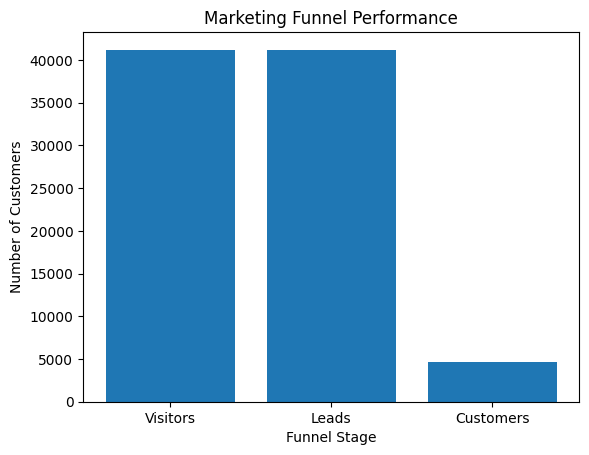

In [9]:
stages = ['Visitors', 'Leads', 'Customers']
counts = [visitors, leads, customers]
plt.figure()
plt.bar(stages, counts)
plt.title('Marketing Funnel Performance')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Customers')
plt.show()

### Step 6 – Drop-off Analysis

The largest drop-off indicates the weakest stage in the funnel.
Optimizing this stage can significantly improve overall conversions.

In [10]:
drop_v_to_l = visitors - leads
drop_l_to_c = leads - customers
drop_v_to_l, drop_l_to_c

(np.int64(4), np.int64(36544))

### Step 7 – Channel Performance

Different contact channels show different conversion efficiencies.
High-performing channels should be prioritized in future campaigns.

In [11]:
channel_analysis = df.groupby('contact').agg(
    visitors=('y', 'count'),
    customers=('is_customer', 'sum')
)
channel_analysis['conversion_rate_%'] = (
    channel_analysis['customers'] / channel_analysis['visitors'] * 100
)
channel_analysis.sort_values(by='conversion_rate_%', ascending=False)

,visitors,customers,conversion_rate_%
contact,,,
cellular,26144,3853,14.737607
telephone,15044,787,5.231321


In [12]:
monthly_analysis = df.groupby('month').agg(
    visitors=('y', 'count'),
    customers=('is_customer', 'sum')
)
monthly_analysis['conversion_rate_%'] = (
    monthly_analysis['customers'] / monthly_analysis['visitors'] * 100
)
monthly_analysis

,visitors,customers,conversion_rate_%
month,,,
apr,2632,539,20.478723
aug,6178,655,10.602137
dec,182,89,48.901099
jul,7174,649,9.046557
jun,5318,559,10.511470
mar,546,276,50.549451
may,13769,886,6.434745
nov,4101,416,10.143867
oct,718,315,43.871866


## Key Insights & Recommendations

1. Significant drop-off occurs between Visitors and Leads  
   → Improve targeting and campaign messaging.

2. Certain contact channels outperform others  
   → Allocate more budget to high-converting channels.

3. Lead to Customer conversion can be improved  
   → Optimize follow-up timing and personalize communication.

4. Conversion rates vary by month  
   → Focus campaigns during high-performing periods.